<a href="https://www.kaggle.com/code/alexandrkolomijec/titanic-basic-solution?scriptVersionId=100724587" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This is a solution for classic beginner's project 'Titanic - Machine Learning from Disaster'. From the history we know, that british passenger liner 'Titanic' sank on 15 april 1912 after striking an iceberg. From 2224 people aboard more than 1500 died. This famous catastrophe draw world's attention and was described as precise as possible. Today we have a data set of the passengers, who were aboard, with confirmation of which one survived or not. Based on this, we will work with  the test data to see if we can predict survivance of the passengers.


# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For now we imported libraries needed for data wrangling. We'll download models later

# 2. Data wrangling
## 2.1. Loading data

In [2]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

Let's see what our data are consisted of

## 2.2. Data exploration

In [3]:
display(train_data.head())
display(test_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
display(train_data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

There are 12 columns (11 for test data) with different type of entities (int, float, object).
Also we can see that some data are missing. For example, Age column  has 177 missing values for the train data  and 86 for the test data. We will fill it later. Embarked column for the train data and Fare column for the test data are missing 2 and 1 value. 
<p>The big problem is the Cabin column. It is almost empty for both data sets. We will drop this column</p>

In [5]:
train_data = train_data.drop('Cabin',axis=1)
test_data = test_data.drop('Cabin',axis=1)

Now let's fill missing values

## 2.2. Filling missing values

We start with  Embarked column for the train data and Fare column for the test data

In [6]:
train_data['Embarked'].fillna(method = 'ffill',inplace=True)
test_data['Fare'].fillna(method = 'ffill',inplace=True)
display(train_data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


None

Now, let's handle Age column for both datasets. The simplest way is to fill by mean value of all rows. But we will go further and explore dependency of Age on different parameters.
<p>Before we continue with Age column it is better to transform object data into int/float one. Obviously, we can't transform names so let's just drop the column</p>

In [7]:
train_data = train_data.drop('Name',axis=1)
test_data = test_data.drop('Name',axis=1)

Next target is the Sex column. We will transform it by command *get_dummies*

In [8]:
train_data = pd.get_dummies(train_data,columns=['Sex'],drop_first = True)
train_data.rename(columns = {'Sex_male':'Sex'}, inplace = True)
test_data = pd.get_dummies(test_data,columns=['Sex'],drop_first = True)
test_data.rename(columns = {'Sex_male':'Sex'}, inplace = True)

Next, we will explore the Ticket column.

In [9]:
display(train_data['Ticket'].nunique())
display(test_data['Ticket'].nunique())

681

363

As we can see, most of the Tickets are unique, so we can't replace them with integers. Let's drop this column.

In [10]:
train_data = train_data.drop('Ticket',axis=1)
test_data = test_data.drop('Ticket',axis=1)

Lastly, we will transform Embarked column.

In [11]:
train_data.loc[train_data['Embarked'] == 'S', 'Embarked'] = 0
train_data.loc[train_data['Embarked'] == 'C', 'Embarked'] = 1
train_data.loc[train_data['Embarked'] == 'Q', 'Embarked'] = 2
test_data.loc[test_data['Embarked'] == 'S', 'Embarked'] = 0
test_data.loc[test_data['Embarked'] == 'C', 'Embarked'] = 1
test_data.loc[test_data['Embarked'] == 'Q', 'Embarked'] = 2

In [12]:
pd.to_numeric(train_data['Embarked'])
train_data['Embarked'] = train_data['Embarked'].astype(int)
pd.to_numeric(test_data['Embarked'])
test_data['Embarked'] = test_data['Embarked'].astype(int)

In [13]:
display(train_data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Sex          891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(1)
memory usage: 56.7 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Sex          418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 23.4 KB


None

Now we have transformed all data into numbers. Let's explore the correlation between Age and other parameters.

In [14]:
train_data.corr(method ='pearson')['Age']

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Embarked       0.023474
Sex            0.093254
Name: Age, dtype: float64

As we can see, there is a quite good correlation with Pclass, SibSp, Parch, Fare and Sex. Let's explore number of unique values for SibSp,Parch and Fare.

In [15]:
display(train_data['SibSp'].nunique())
display(train_data['Parch'].nunique())
display(train_data['Fare'].nunique())

7

7

248

There is too much unique elements for Fare column to make our Age predictions based on it. SibSp and Parch columns also have quite big numbers. We will fill Age column based on Pclass and Sex columns.

In [16]:
train_data.groupby(['Pclass','Sex'], as_index=False)['Age'].mean().round(0)

,Pclass,Sex,Age
0,1,0,35.0
1,1,1,41.0
2,2,0,29.0
3,2,1,31.0
4,3,0,22.0
5,3,1,27.0


In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):

        if Sex == 0:
            if Pclass == 1:
                return 35

            elif Pclass == 2:
                return 29

            else:
                return 23
        else:
            if Pclass == 1:
                return 41

            elif Pclass == 2:
                return 31

            else:
                return 26

    else:
        return Age

In [18]:
train_data['Age'] = train_data[['Age','Pclass','Sex']].apply(impute_age,axis=1)
test_data['Age'] = test_data[['Age','Pclass','Sex']].apply(impute_age,axis=1)

In [19]:
display(train_data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Sex          891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(1)
memory usage: 56.7 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Sex          418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 23.4 KB


None

Now, as we filled and transformed all columns, let's create some graphs!

# 3. Data visualisation

Firstly, we delete Id column from our train data

In [20]:
train_data = train_data.drop('PassengerId',axis=1)

Let's start with heatmap of correlations. It'll help us to understand, which parameter is more correlated with the  survival data.

Text(0.5, 1.0, 'Training Set Correlations')

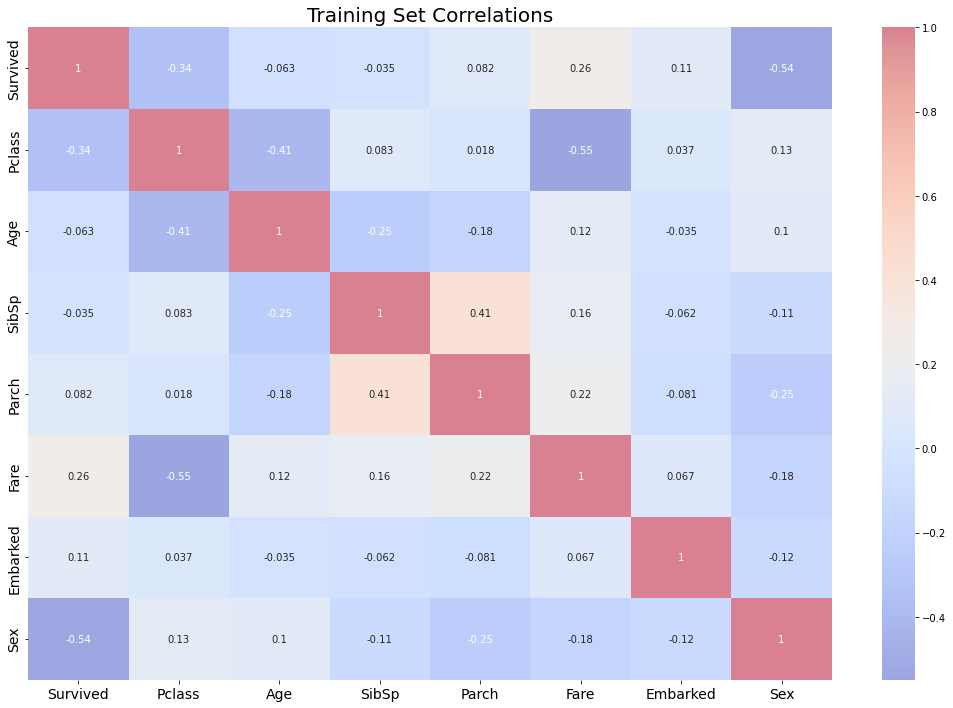

In [21]:
plt.figure(figsize=(18,12))
heat = sns.heatmap(data=train_data.corr(), annot=True, cmap='coolwarm',alpha=0.5)
heat.tick_params(axis='x', labelsize=14)
heat.tick_params(axis='y', labelsize=14)
heat.set_title('Training Set Correlations', size=20)

As we can see, survival rate has the best correlation with Sex, then Pclass and then Fare. Other parameters show lesser influence on the survival rate.
<p>Now let's see how many passengers survived.</p>

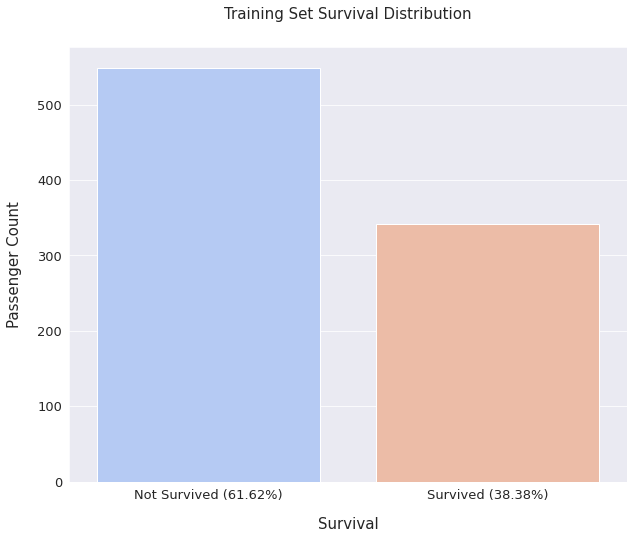

In [22]:
survived = train_data['Survived'].value_counts()[1]
not_survived = train_data['Survived'].value_counts()[0]
survived_per = survived / train_data.shape[0] * 100
not_survived_per = not_survived / train_data.shape[0] * 100



plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
sns.countplot(x = train_data['Survived'], palette = 'coolwarm')

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()

Only 38% of  passengers, which is a huge disaster!

Now, let's explore different parameters. We will start with the Pclass. It's interesting to see the distribution of passengers between classes and survival rate between classes.

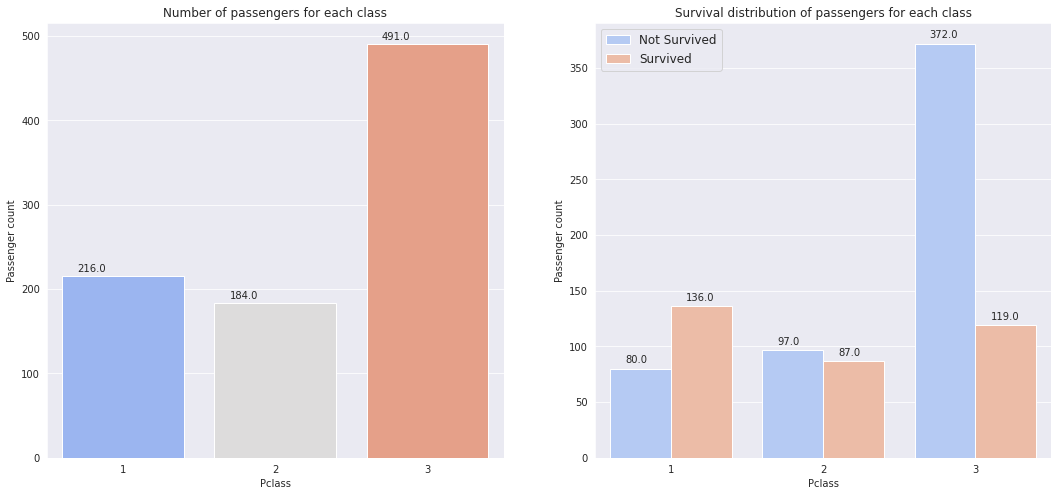

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.set_style('darkgrid')

cc = sns.countplot(x='Pclass',data = train_data, palette='coolwarm', ax = ax[0])
for p in cc.patches:
        cc.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[0].set_title('Number of passengers for each class')
ax[0].set_ylabel('Passenger count')

cs = sns.countplot(x='Pclass',data = train_data,hue = 'Survived', palette='coolwarm',ax=ax[1])
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[1].set_title('Survival distribution of passengers for each class')
ax[1].set_ylabel('Passenger count')
ax[1].legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

Most of the passengers were in the 3rd class, where survival rate is horrible (only 24% of passenges from 3rd class survived). The 2nd class has almost 50/50 survival rate and the 1st class has 63% survival rate.

Let's explore age distribution of passengers.

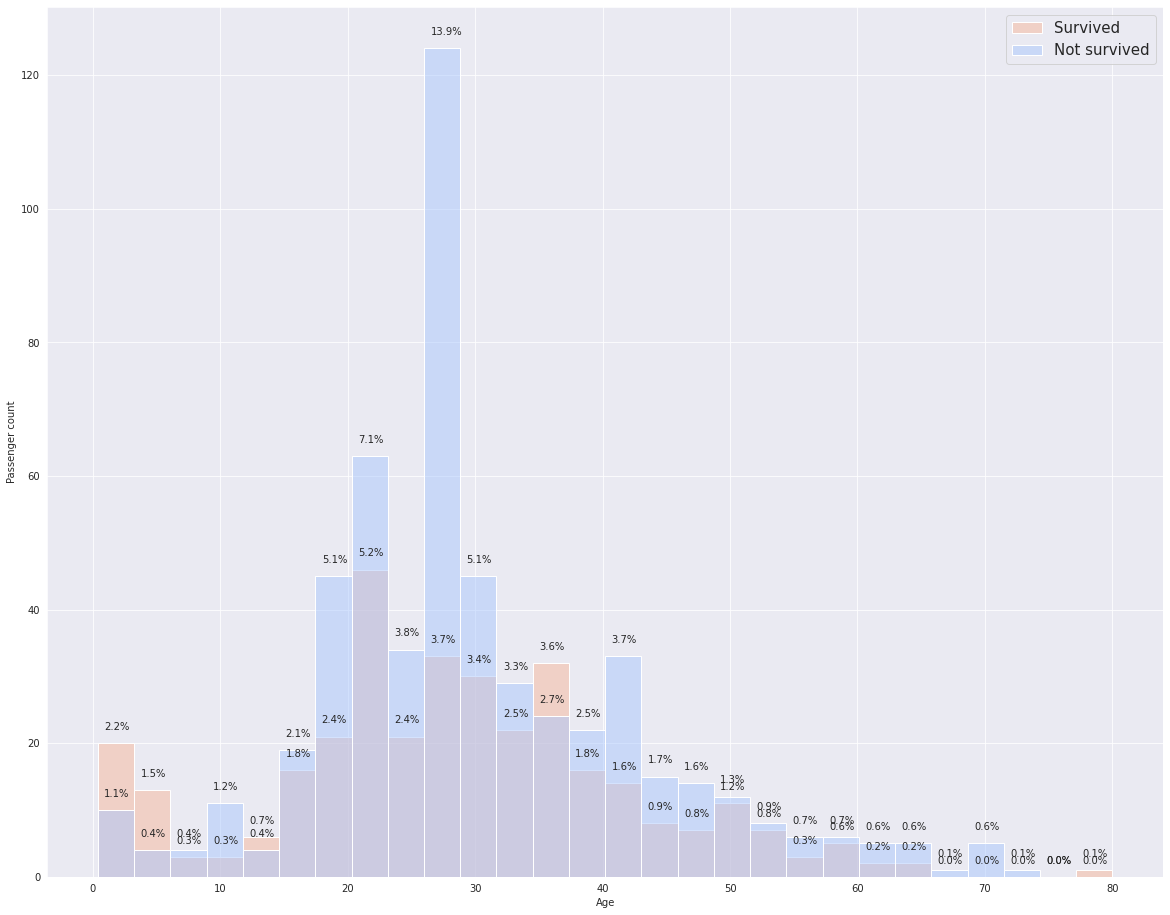

In [24]:
plt.figure(figsize=(20,16))
sns.set_style('darkgrid')
total = len(train_data['Age'])*1.
ca = sns.histplot(x='Age',hue = train_data['Survived'],data=train_data, palette = 'coolwarm')
for p in ca.patches:
        ca.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.5, p.get_height()+2))
ca.set_ylabel('Passenger count')
ca.legend(['Survived', 'Not survived'], loc='upper right', prop={'size': 15})

Most of the passengers were in the age between 20 to 30 years. This age category also has the smallest survival rate.

Now we will explore SibSp and Parch columns. Let's combine them in two subplots.

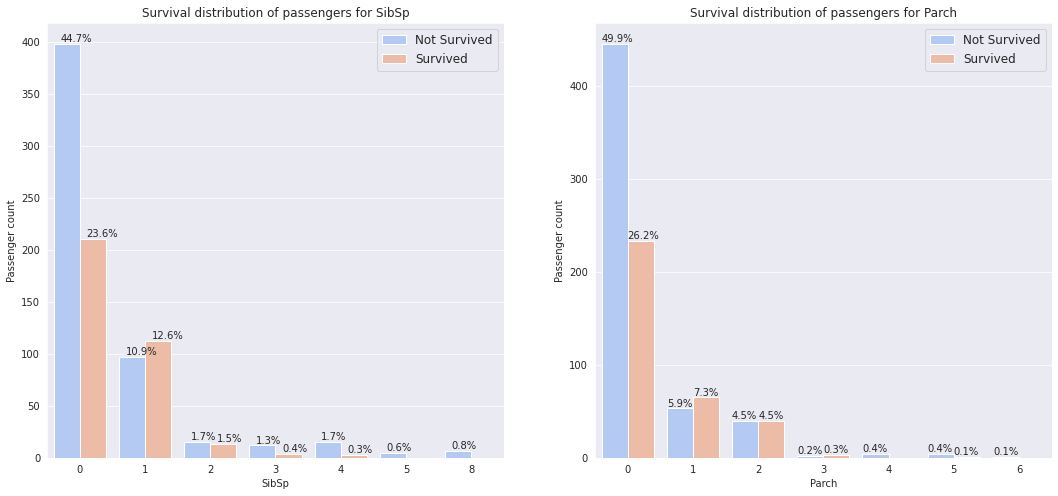

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.set_style('darkgrid')
total = len(train_data['SibSp'])*1.
ca = sns.countplot(x='SibSp',hue = train_data['Survived'],data=train_data, palette='coolwarm', ax=ax[0])
for p in ca.patches:
        ca.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+2))
ax[0].set_title('Survival distribution of passengers for SibSp')
ax[0].set_ylabel('Passenger count')
ax[0].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})

ca = sns.countplot(x='Parch',hue = train_data['Survived'],data=train_data, palette='coolwarm', ax=ax[1])
for p in ca.patches:
        ca.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0, p.get_height()+2))
ax[1].set_title('Survival distribution of passengers for Parch')
ax[1].set_ylabel('Passenger count')
ax[1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})

Most of the passengers were alone. Interesting, that survival rate of the passengers with 1 sibling/spouse and 1 parent/children is the highest.

Next column is the Fare. Let's see passenger distribution along with the survival rate.

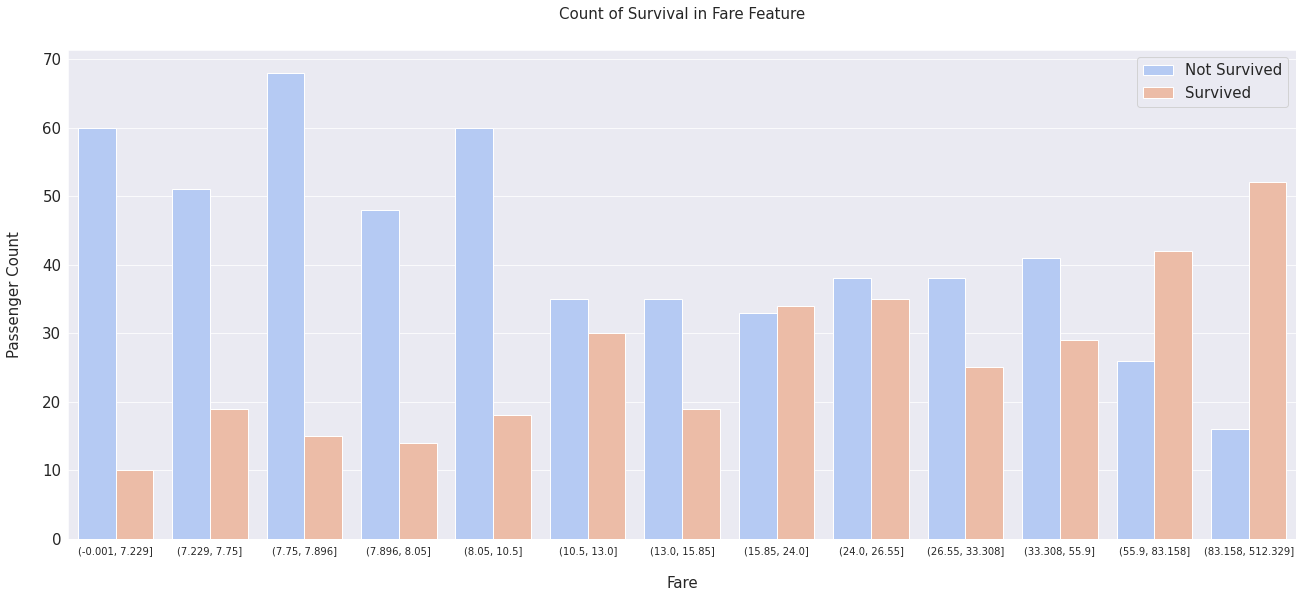

In [26]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x=pd.qcut(train_data['Fare'], 13), hue='Survived', data=train_data, palette='coolwarm')

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)
plt.show()

The higher the price of the ticket - the higher survival rate. The heatmap we created earlier showed high correlation between the Fare and the Pclass. Let's explore it then.

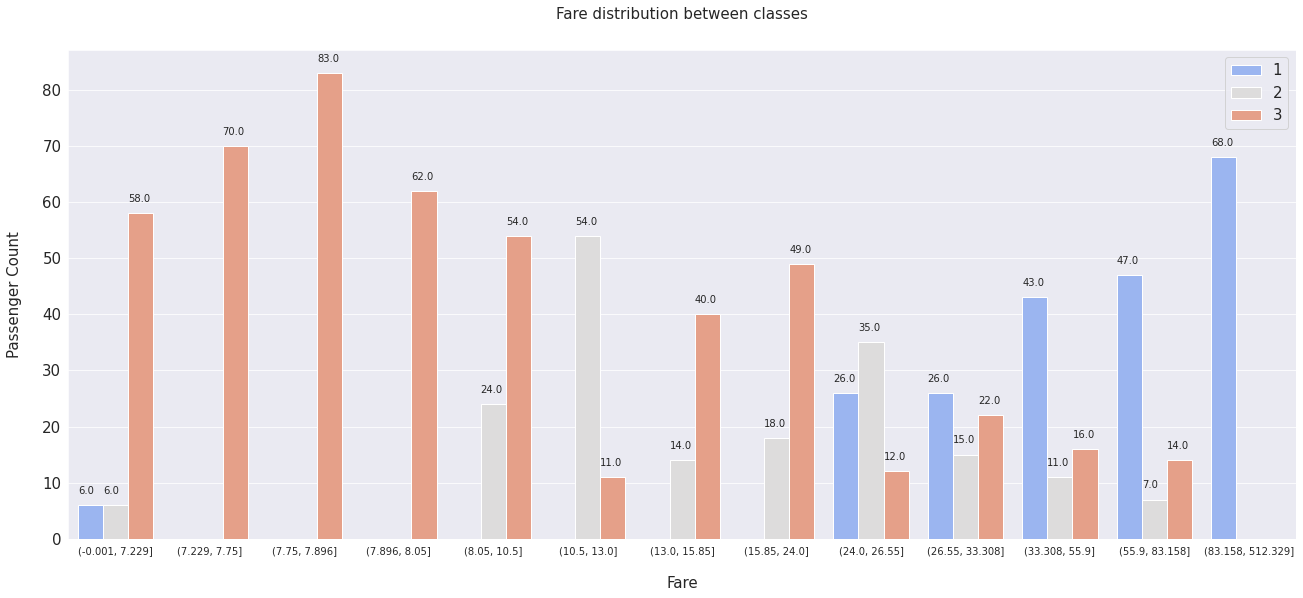

In [27]:
fig, axs = plt.subplots(figsize=(22, 9))
cs = sns.countplot(x=pd.qcut(train_data['Fare'], 13), hue='Pclass', data=train_data, palette='coolwarm')

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+2))

plt.legend(['1', '2', '3'], loc='upper right', prop={'size': 15})
plt.title('Fare distribution between classes', size=15, y=1.05)
plt.show()

Except 12 odd values for the 1st and the 2nd classes (within range 0-7.229), the plot confirms correlation between the cost of the ticket and the class.

Now, we will explore the Embarked column.

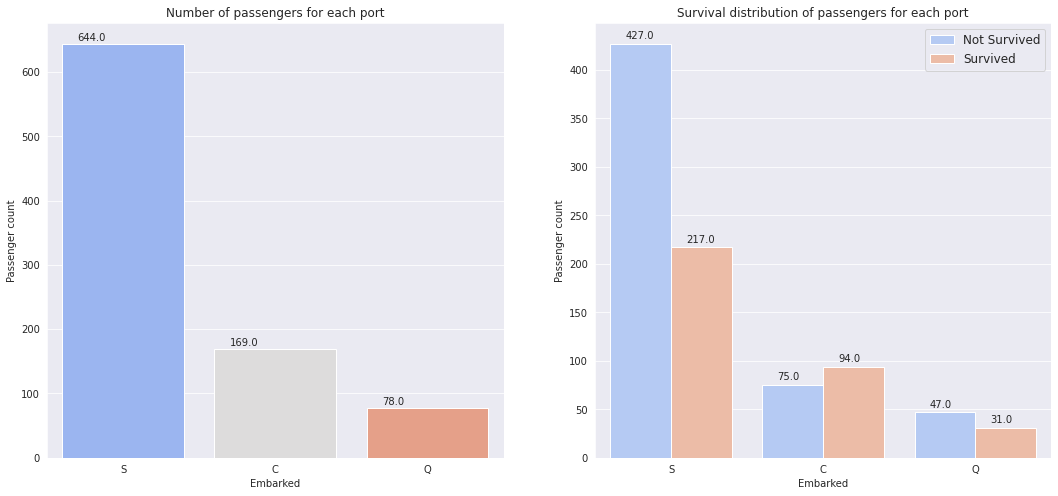

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.set_style('darkgrid')

cc = sns.countplot(x='Embarked',data = train_data, palette='coolwarm', ax = ax[0])
for p in cc.patches:
        cc.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[0].set_title('Number of passengers for each port')
ax[0].set_xticklabels(['S', 'C', 'Q'])
ax[0].set_ylabel('Passenger count')

cs = sns.countplot(x='Embarked',data = train_data,hue = 'Survived', palette='coolwarm',ax=ax[1])
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[1].set_title('Survival distribution of passengers for each port')
ax[1].set_xticklabels(['S', 'C', 'Q'])
ax[1].set_ylabel('Passenger count')
ax[1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

Most of the passengers were from the "S" port. Suprisingly, the "C" port shows higher ratio of survived. As we know for now, highest correlation with the "Survival"  have "Sex" and "Pclass" parameters. Let's explore them.

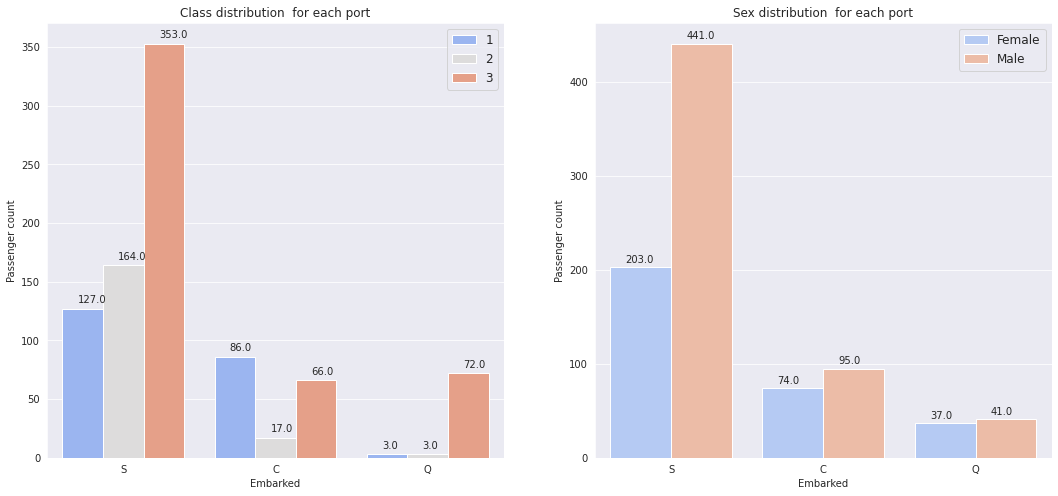

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.set_style('darkgrid')
cs = sns.countplot(x='Embarked',data = train_data,hue = 'Pclass', palette='coolwarm', ax=ax[0])
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[0].set_title('Class distribution  for each port')
ax[0].set_xticklabels(['S', 'C', 'Q'])
ax[0].set_ylabel('Passenger count')
ax[0].legend(['1', '2', '3'], loc='upper right', prop={'size': 12})

cs = sns.countplot(x='Embarked',data = train_data,hue = 'Sex', palette='coolwarm', ax=ax[1])
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[1].set_title('Sex distribution  for each port')
ax[1].set_xticklabels(['S', 'C', 'Q'])
ax[1].set_ylabel('Passenger count')
ax[1].legend(['Female', 'Male'], loc='upper right', prop={'size': 12})
plt.show()

We can see, that the class distribution for the "C" port is different then for other two. Sex distribution shows, that both ports "C" and "Q" have almost equal numbers of male and female passengers while number of male passengers from "S" port is more than twice the number of female passengers.

Now we continue with "Sex" column.

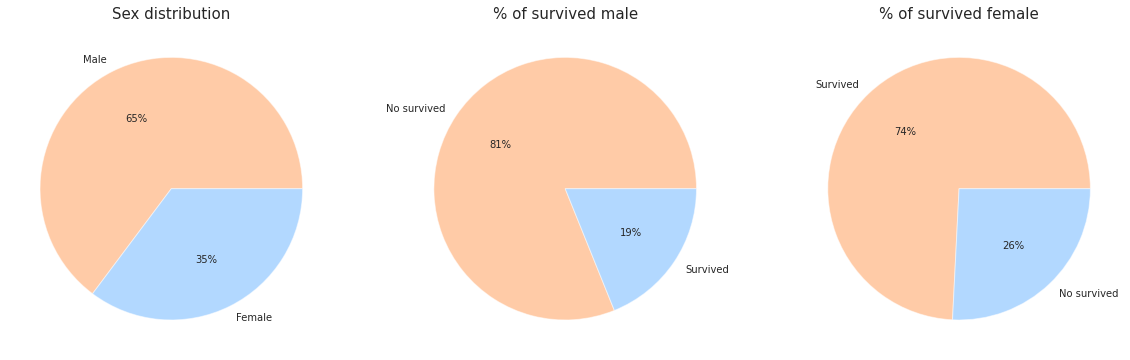

In [30]:

fig, axes = plt.subplots(1, 3, figsize=(20,8))

axes[0].pie(train_data.loc[train_data['Sex'],'Sex'].value_counts(),labels = ['Male','Female'],autopct='%1.0f%%', colors = ['#ff9950','#66b3ff'],wedgeprops={'alpha':0.5})
axes[0].set_title('Sex distribution', fontsize = 15)

axes[1].pie(train_data.loc[train_data["Sex"] == 1, "Survived"].value_counts(),labels = ['No survived','Survived'],autopct='%1.0f%%',colors = ['#ff9950','#66b3ff'],wedgeprops={'alpha':0.5})
axes[1].set_title('% of survived male', fontsize = 15)

axes[2].pie(train_data.loc[train_data["Sex"] == 0, "Survived"].value_counts(),labels = ['Survived','No survived'], autopct='%1.0f%%',colors = ['#ff9950','#66b3ff'],wedgeprops={'alpha':0.5})
axes[2].set_title('% of survived female', fontsize = 15)

plt.show()

As it was non-directly confirmed earlier, the number of male passengers is bigger than the number of female passengers. However, the survival rate is higher for female passengers.

For the end, let's create some violin plots. For example, Pclass-Age and Sex-Age distribution with Survived as parameter.

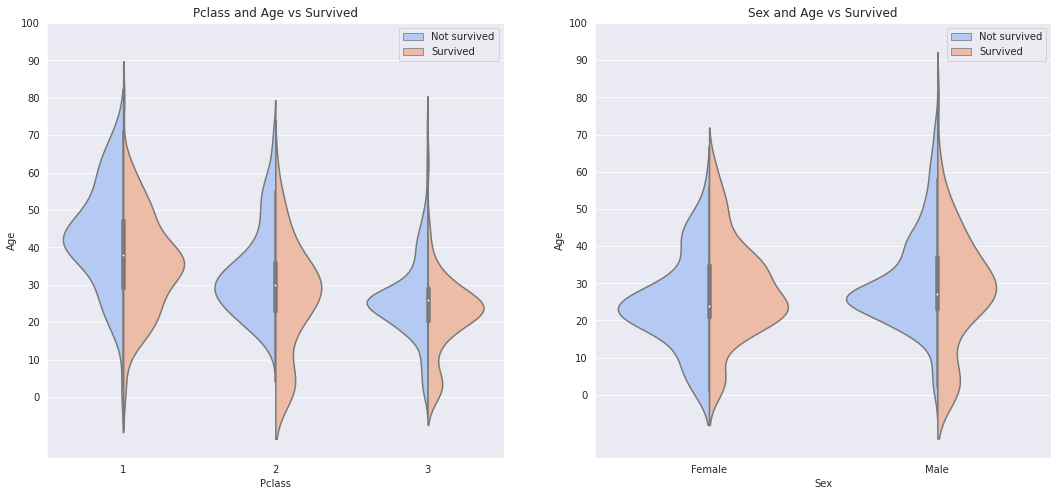

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.set_style('darkgrid')
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=train_data,palette='coolwarm',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
ax[0].legend(handles=ax[0].legend_.legendHandles, labels=['Not survived', 'Survived'])
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=train_data,palette = 'coolwarm',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
ax[1].legend(handles=ax[1].legend_.legendHandles, labels=['Not survived', 'Survived'])
ax[1].set_xticklabels(['Female', 'Male'])
plt.show()

As we can see, older passenger have higher class, but younger passenger have better survival rate for all classes.

Now, let's train our model and make a predictions!

# 4. Predictons
## 4.1. Models import 

We will import some base models for making predictions.

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

Now we will split our train data so we can observe which model has better score.

In [33]:
X = train_data.drop('Survived', axis =1)
y = train_data['Survived']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

First model will be logistic regression.

In [34]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[133  21]
 [ 38  76]]


Logistic regression shows pretty good score. We will continue with K neighbor classifier. Additionally, we will observe for which number of neighbors the model shows the best results.

Start the model with for loop.

In [35]:
error = []
for i in range (1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error.append(np.mean(y_predi != y_test))


Now, let's print error distribution for the number of neighbors

Text(0, 0.5, 'Error')

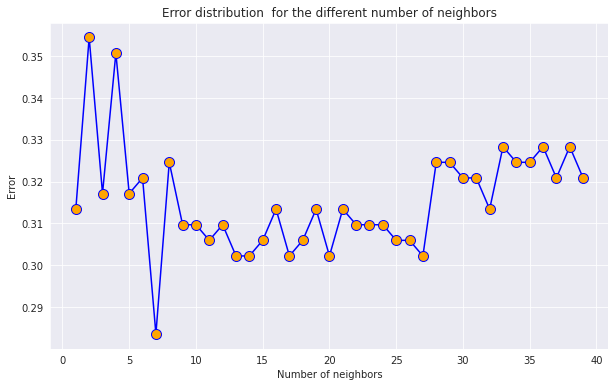

In [36]:
plt.figure(figsize=(10,6))
er = plt.plot(range(1,40),error,color='blue',marker='o',markerfacecolor='orange',markersize=10)
plt.title('Error distribution  for the different number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Error')

The smallest error is for 7 neighbors. We will use this number for our model.

In [37]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       154
           1       0.70      0.59      0.64       114

    accuracy                           0.72       268
   macro avg       0.71      0.70      0.70       268
weighted avg       0.71      0.72      0.71       268

[[125  29]
 [ 47  67]]


Even with the best model parameters K neighbor classifier model is worse in predictions then logistic regression model.

Now, let's use the decision tree classifier model.

In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       154
           1       0.74      0.67      0.70       114

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

[[127  27]
 [ 38  76]]


This model shows the same accuracy, precision and f1-score as logistic regression.

Now, we will use our last model: the random forestt classifier.

In [39]:
random_forest = RandomForestClassifier(n_estimators=200)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       154
           1       0.77      0.71      0.74       114

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

[[130  24]
 [ 33  81]]


The Random Forest Classifier shows the best scores. We will use it for our predictions.

In [40]:
X_data = test_data.drop('PassengerId', axis=1).copy()
X_train = train_data.drop('Survived', axis =1)
y_train = train_data['Survived']

In [41]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_data)

In [42]:
PassengerId = test_data['PassengerId']

In [43]:
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived':Y_pred })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [44]:
submission.to_csv("Titanic_predictions_Kolomijec.csv", index = False)